In [14]:
import tensorflow as tf
print(f"wersja tf: {tf.__version__}")

wersja tf: 2.10.1


In [15]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [16]:
x_train, x_test  = x_train/255.0, x_test/255.0

In [17]:
#budowa modelu sieci neuronowych

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
#predykcja na niewytrenowanym modelu
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.2856568 , 0.3695498 , 0.10429991, 0.16826382, -0.4069387 ,
 0.00853374, -0.19175063, 0.1077853 , 0.42058364, 0.38418567]],
 dtype=float32)

In [19]:
tf.nn.softmax(predictions).numpy()

array([[0.11396581, 0.12393924, 0.09506316, 0.10134245, 0.05701435,
 0.08638166, 0.07070322, 0.09539507, 0.13042851, 0.12576653]],
 dtype=float32)

In [20]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0384 - accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0361 - accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0334 - accuracy: 0.9883


In [22]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0769 - accuracy: 0.9776 - 545ms/epoch - 2ms/step


[0.07693543285131454, 0.9775999784469604]

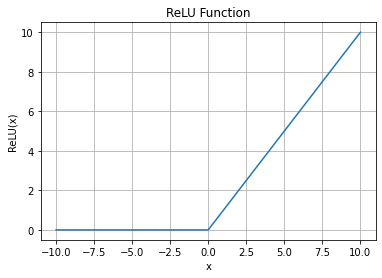

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Creating an array of x values from -10 to 10
x = np.linspace(-10, 10, 1000)

# Defining the relu function
relu = lambda x: np.maximum(0, x)

plt.plot(x, relu(x))
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()

In [28]:
# Training the model and storing its history
history = model.fit(x_train,y_train,epochs=5)

# Extracting accuracy values
accuracy = history.history['accuracy']

# Creating an array to represent epoch numbers
epochs = range(1, len(accuracy) + 1)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9895
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0311 - accuracy: 0.9896
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9915


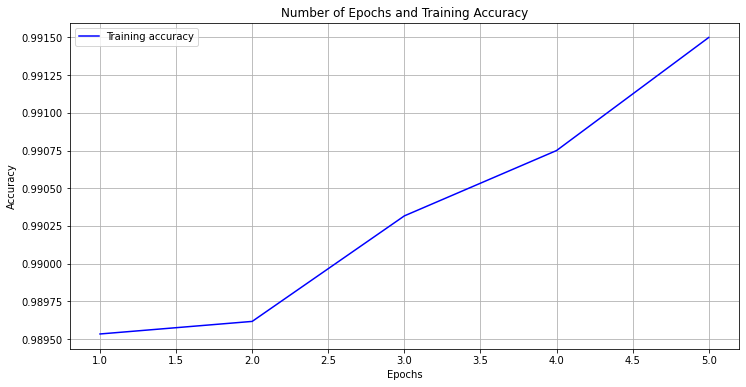

In [29]:
# Plotting accuracy versus epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Number of Epochs and Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()